<a href="https://colab.research.google.com/github/kavyatejaswini24/EMIPredict-AI---Intelligent-Financial-Risk-Assessment-Platform/blob/main/2_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

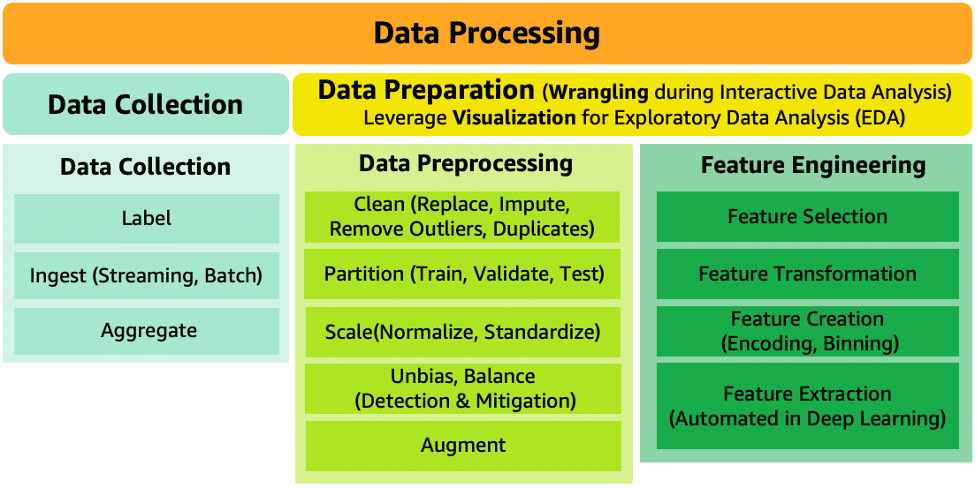

#  Mount Google Drive to read file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = r"/content/drive/MyDrive/Projects/Project excellence series/ML_Classification&Regression/cleaned_data.csv"  # Change the path if needed
data = pd.read_csv(file_path)
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.000,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.000,MEDICAL,12.87,0.37,3.0,635.0,No,1
3,23.0,female,Bachelor,79753.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,No,1
4,24.0,male,Master,66135.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,No,1


In [ ]:
data.shape

(44988, 14)

# **Encoding the categorical columns**

* Applying OHE for columns with categories that have no inherent order (nominal data).
* Ordinal Encoding for columns with categories that have a clear order (ordinal data).

In [ ]:
data.select_dtypes(include=['object']).columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

**Nominal columns**

In [ ]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [ ]:
nominal_data = ['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

# Define One-Hot Encoder
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')


# Fit and Transform
encoded_array = ohe.fit_transform(data[nominal_data]).toarray()

# Convert Encoded Data to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(nominal_data))
encoded_df = encoded_df.astype(int)


# Concatenate with Original DataFrame (Drop Original Categorical Columns)
df = pd.concat([data.drop(columns=nominal_data), encoded_df], axis=1)

In [ ]:
df.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,Master,71948.0,0.0,23093.125,16.02,0.37,3.0,561.0,1,0,0,0,1,0,0,0,1,0,0
1,21.0,High School,12282.0,0.0,1000.000,11.14,0.08,2.0,504.0,0,0,0,1,0,1,0,0,0,0,1
2,25.0,High School,12438.0,3.0,5500.000,12.87,0.37,3.0,635.0,1,0,0,0,0,0,0,1,0,0,0
3,23.0,Bachelor,79753.0,0.0,23093.125,15.23,0.37,2.0,675.0,1,0,0,0,1,0,0,1,0,0,0
4,24.0,Master,66135.0,1.0,23093.125,14.27,0.37,4.0,586.0,1,1,0,0,1,0,0,1,0,0,0


**Ordinal**

In [ ]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [ ]:
education_order = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']

# Define Encoder with Custom Order
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Fit and Transform
df['person_education'] = ordinal_encoder.fit_transform(df[['person_education']])

df['person_education'] = df['person_education'].astype(int)

In [ ]:
df['person_education'].unique()

array([3, 0, 2, 1, 4])

In [ ]:
df.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,3,71948.0,0.0,23093.125,16.02,0.37,3.0,561.0,1,0,0,0,1,0,0,0,1,0,0
1,21.0,0,12282.0,0.0,1000.000,11.14,0.08,2.0,504.0,0,0,0,1,0,1,0,0,0,0,1
2,25.0,0,12438.0,3.0,5500.000,12.87,0.37,3.0,635.0,1,0,0,0,0,0,0,1,0,0,0
3,23.0,2,79753.0,0.0,23093.125,15.23,0.37,2.0,675.0,1,0,0,0,1,0,0,1,0,0,0
4,24.0,3,66135.0,1.0,23093.125,14.27,0.37,4.0,586.0,1,1,0,0,1,0,0,1,0,0,0


# Handling Skewness

If the data is perfectly normally distributed, the skewness score should be close to 0.

**Interpretation of Skewness Values**


|Skewness Score|	Interpretation|
|--------------|---------------|
|0	|Perfectly symmetric (normal distribution)|
|-0.5 to 0.5	|Approximately symmetric (almost normal)|
|<-0.5 (Negative Skewed)|	Left-skewed (tail on the left)|
|>0.5 (Positive Skewed)|	Right-skewed (tail on the right)|
|>1 or <-1|	Highly skewed|

In [ ]:
columns = ['person_age', 'person_emp_exp','cb_person_cred_hist_length','person_income','loan_percent_income','loan_amnt','credit_score']
skewness = df[columns].skew()
skewness

,0
person_age,0.914964
person_emp_exp,1.073349
cb_person_cred_hist_length,1.104888
person_income,0.874632
loan_percent_income,0.828374
loan_amnt,0.813330
credit_score,-0.536184


### Visualizing the skewness

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

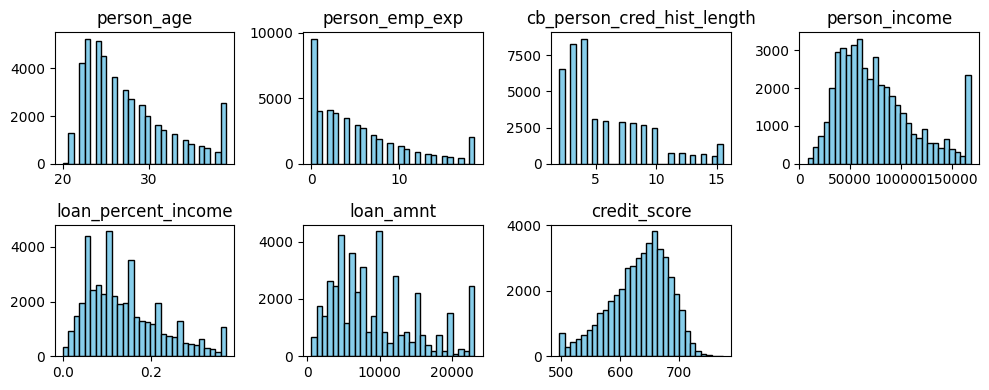

In [ ]:
# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness[abs(skewness) > 0.5].index

# Plot histograms before transformation
plt.figure(figsize=(10, 4))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 4, i)  # Adjust grid size as needed
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

The  skewness values suggest that some columns are positively skewed, and one  is almost normally distributed.

**Transformation Approach:**

* For positively skewed columns (> 0.5): log transformation (np.log1p) or Box-Cox transformation.


# Apply Log Transform to Positively Skewed Columns

In [ ]:
import numpy as np

# Columns that are positively skewed
pos_skewed_cols = ['person_age', 'person_emp_exp', 'cb_person_cred_hist_length',
                   'person_income', 'loan_percent_income', 'loan_amnt']

# Apply log transformation to positively skewed columns

df[pos_skewed_cols] = df[pos_skewed_cols].apply(lambda x: np.log1p(x))

Standard scaling for credit score column

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df['credit_score'] = scaler.fit_transform(df[['credit_score']])

In [ ]:
df.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,3.135494,3,11.183713,0.000000,10.047334,16.02,0.314811,1.386294,-1.442241,1,0,0,0,1,0,0,0,1,0,0
1,3.091042,0,9.415971,0.000000,6.908755,11.14,0.076961,1.098612,-2.587561,0,0,0,1,0,1,0,0,0,0,1
2,3.258097,0,9.428592,1.386294,8.612685,12.87,0.314811,1.386294,0.044667,1,0,0,0,0,0,0,1,0,0,0
3,3.178054,2,11.286702,0.000000,10.047334,15.23,0.314811,1.098612,0.848400,1,0,0,0,1,0,0,1,0,0,0
4,3.218876,3,11.099469,0.693147,10.047334,14.27,0.314811,1.609438,-0.939907,1,1,0,0,1,0,0,1,0,0,0


# Feature importances using Random Forest(Classification)

It’s a score assigned to each feature to reflect how useful or valuable it was in building the model — i.e., how much it contributed to reducing prediction error.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
feature_importance_df


,Feature,Importance
18,previous_loan_defaults_on_file_Yes,0.216174
6,loan_percent_income,0.170718
5,loan_int_rate,0.159417
2,person_income,0.124780
12,person_home_ownership_RENT,0.058382
4,loan_amnt,0.057769
8,credit_score,0.055136
0,person_age,0.029780
3,person_emp_exp,0.026639
7,cb_person_cred_hist_length,0.024949


# Bar Graph for Feature Importance

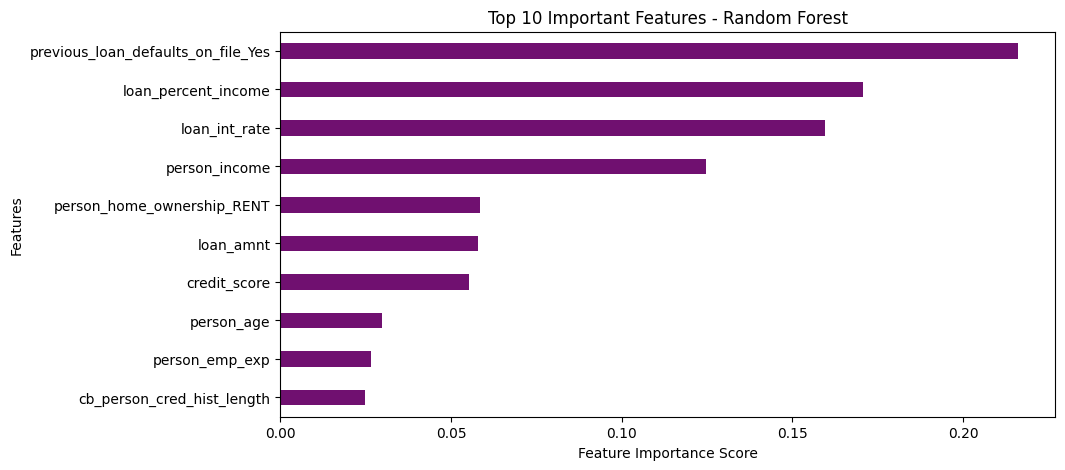

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance_df['Importance'][:10], y=feature_importance_df['Feature'][:10], color='purple', width=0.4)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features - Random Forest")
plt.show()


In [ ]:
# columns to consider

feature_importance_df['Feature'][:10].tolist()

['previous_loan_defaults_on_file_Yes',
 'loan_percent_income',
 'loan_int_rate',
 'person_income',
 'person_home_ownership_RENT',
 'loan_amnt',
 'credit_score',
 'person_age',
 'person_emp_exp',
 'cb_person_cred_hist_length']

In [ ]:
top_10 = ['person_age', 'person_income','person_emp_exp', 'person_home_ownership',
          'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file','loan_status']

filtered1 = data[top_10] # original data

filtered1.head()

,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,71948.0,0.0,RENT,23093.125,16.02,0.37,3.0,561.0,No,1
1,21.0,12282.0,0.0,OWN,1000.000,11.14,0.08,2.0,504.0,Yes,0
2,25.0,12438.0,3.0,MORTGAGE,5500.000,12.87,0.37,3.0,635.0,No,1
3,23.0,79753.0,0.0,RENT,23093.125,15.23,0.37,2.0,675.0,No,1
4,24.0,66135.0,1.0,RENT,23093.125,14.27,0.37,4.0,586.0,No,1


# Saving the filtered data to drive

In [ ]:
file_path = '/content/drive/MyDrive/Projects/Project excellence series/ML_Classification&Regression/classification.csv'
filtered1.to_csv(file_path, index=False)

# Binning example (not applied in this project)

In [ ]:
filtered1['person_age'].unique()

array([22., 21., 25., 23., 24., 26., 20., 32., 34., 29., 33., 28., 35.,
       31., 27., 30., 36., 39., 37., 38.])

In [ ]:
filtered1['person_age'].min(),filtered1['person_age'].max()

(20.0, 39.0)

In [ ]:
filtered1['age_categories'] = pd.cut(filtered1['person_age'],bins = 4,labels=['young','middle','senior','elder'])

In [ ]:
filtered1['age_categories'].unique()

['young', 'middle', 'senior', 'elder']
Categories (4, object): ['young' < 'middle' < 'senior' < 'elder']

In [ ]:
filtered1[['person_age','age_categories']]

,person_age,age_categories
0,22.0,young
1,21.0,young
2,25.0,middle
3,23.0,young
4,24.0,young
...,...,...
44983,27.0,middle
44984,37.0,elder
44985,33.0,senior
44986,29.0,middle
